# GLOBAL TRENDS IN MENTAL HEALTH DISORDERS

## This project encompasses a comprehensive dataset that encompasses a global perspective on the prevalence of mental health disorders such as schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression, and alcohol use disorders. The primary objective of this endeavor is to shed light on the gravity of these mental health conditions and their profound impact on individuals worldwide.

##### We are majorly going to work with these countries; Afghanistan, India, China, Japan, Korea, Germany, France, Czech Republic, England, Ireland, Sweden,  Australia, Nigeria, Ghana, Kenya, South Africa, Canada, Colombia, Jamaica

The dataset used can be found at https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder/

# Data Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation and Cleaning

In [2]:
trends_df = pd.read_csv("/Users/mac/Mental-health-Depression-disorder-Data.csv", low_memory=False)

In [3]:
trends_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
trends_df.shape

(108553, 11)

In [4]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


There are 11 columns to work with for EDA. Right off the bat, there are a few columns that contain null values.

In [5]:
trends_df.nunique()

index                        108553
Entity                          276
Code                            236
Year                            259
Schizophrenia (%)             25661
Bipolar disorder (%)          19358
Eating disorders (%)          72657
Anxiety disorders (%)          6457
Drug use disorders (%)         6435
Depression (%)                 6460
Alcohol use disorders (%)      6459
dtype: int64

## Handling Null Values

### To start with the very basic of data cleaning, lets check if any of the columns have any null or missing values

In [6]:
trends_df.isnull().values.any()

True

##### total sum of the null values in each column

In [7]:
trends_df.isnull().sum()

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64

##### total sum of the null values from all the columns

In [8]:
trends_df.isnull().sum().sum()

593894

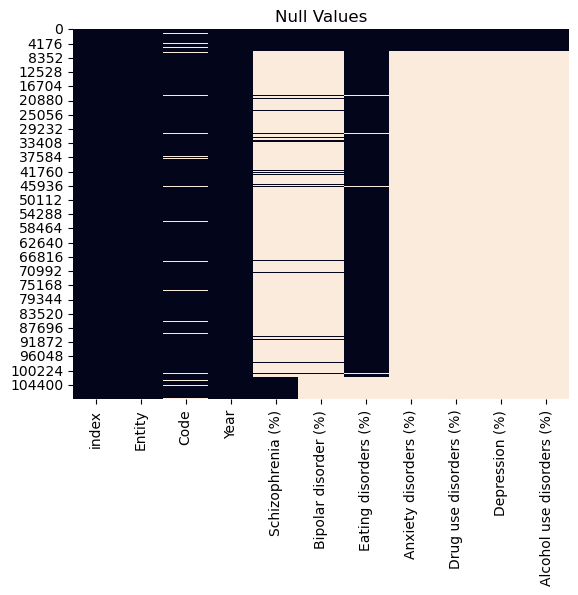

In [9]:
plt.title("Null Values");
sns.heatmap(trends_df.isnull(), cbar=False);

### Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 59,3894 null values across the entire dataset with 5,412 missing entries under 'code', 82,678 under 'Schizophrenia', 19,358 under 'Bipolar disorder', 72,657 under 'Eating disorders', and a lot more entries under other columns. We will have to handle all null data points before we can dive into EDA and modeling.

In [10]:
trends_df['Code'].fillna('No code', inplace=True)
trends_df['Schizophrenia (%)'].fillna("0.0", inplace=True)
trends_df['Bipolar disorder (%)'].fillna('0.0', inplace=True)
trends_df['Eating disorders (%)'].fillna("0.0", inplace=True)
trends_df['Anxiety disorders (%)'].fillna("0.0", inplace=True)
trends_df['Drug use disorders (%)'].fillna("0.0", inplace=True)
trends_df['Depression (%)'].fillna("0.0", inplace=True)
trends_df['Alcohol use disorders (%)'].fillna("0.0", inplace=True)

#### For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since most of our important columns contain null values, i chose to replace the missing values with `0.0`.

In [11]:
trends_df.isnull().any()

index                        False
Entity                       False
Code                         False
Year                         False
Schizophrenia (%)            False
Bipolar disorder (%)         False
Eating disorders (%)         False
Anxiety disorders (%)        False
Drug use disorders (%)       False
Depression (%)               False
Alcohol use disorders (%)    False
dtype: bool

### Earlier, I mentioned countries we'll be working with. Let's select them and add them into a new dataframe

In [12]:
# list of countries we're working with
selected_countries = [
    'Afghanistan', 'India', 'China', 'Japan', 'Korea', 'Germany', 'France',
    'Czech Republic', 'England', 'Ireland', 'Sweden', 'Australia', 'Nigeria',
    'Ghana', 'Kenya', 'South Africa', 'Canada', 'Colombia', 'Jamaica'
]

count = trends_df["Entity"].isin(selected_countries)

countries_df = trends_df[count].loc[:6468]
countries_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.82974,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.70532,4.09619,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.66926
...,...,...,...,...,...,...,...,...,...,...,...
5567,5567,Sweden,SWE,2013,0.276273,1.058865,0.555076,5.301412,0.647249,4.533727,1.808595
5568,5568,Sweden,SWE,2014,0.275014,1.058557,0.559841,5.299064,0.663567,4.524133,1.770598
5569,5569,Sweden,SWE,2015,0.2736,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177
5570,5570,Sweden,SWE,2016,0.272043,1.058056,0.569377,5.295184,0.706037,4.50042,1.659861


### the dataframe above contains only the selected countries we're working with

### Now, i know this might seem like a lot to cover and analyze. But we're talking global here and also mental health disorders. Mental health disorders come in different variations and we have several countries in the world with different issues influencing mental health disorders one way or another. Hence, the quantity of data to be analyzed.

#### We can remove our custom index column since we already have a default index provided by pandas.

In [13]:
countries_df.drop(columns=["index"], inplace=True)

In [14]:
countries_df

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.82974,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.70532,4.09619,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.66926
...,...,...,...,...,...,...,...,...,...,...
5567,Sweden,SWE,2013,0.276273,1.058865,0.555076,5.301412,0.647249,4.533727,1.808595
5568,Sweden,SWE,2014,0.275014,1.058557,0.559841,5.299064,0.663567,4.524133,1.770598
5569,Sweden,SWE,2015,0.2736,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177
5570,Sweden,SWE,2016,0.272043,1.058056,0.569377,5.295184,0.706037,4.50042,1.659861


In [15]:
countries_df.describe()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,504,504,504,504,504,504,504.00000,504.000000,504.000000,504.000000
unique,18,18,28,503,503,504,504.00000,504.000000,504.000000,504.000000
top,Afghanistan,AFG,1990,0.31467,0.751343,0.101855,4.82883,1.677082,4.071831,0.672404
freq,28,28,18,2,2,1,1.00000,1.000000,1.000000,1.000000


### In our `trends_df.info()`, we noticed we had some objects so lets check what columns they might be

In [17]:
countries_df.Year

0       1990
1       1991
2       1992
3       1993
4       1994
        ... 
5567    2013
5568    2014
5569    2015
5570    2016
5571    2017
Name: Year, Length: 504, dtype: object

### Since our `countries_df.Year` column is an object, lets change it to the proper dtype using `pd.to_datetime()` funtion

In [18]:
countries_df["Year"] = pd.to_datetime(countries_df.Year)

In [85]:
countries_df.Year

0      1990-01-01
1      1991-01-01
2      1992-01-01
3      1993-01-01
4      1994-01-01
          ...    
5567   2013-01-01
5568   2014-01-01
5569   2015-01-01
5570   2016-01-01
5571   2017-01-01
Name: Year, Length: 504, dtype: datetime64[ns]

In [19]:
unique_values = countries_df["Entity"].unique()
print(unique_values)

['Afghanistan' 'Australia' 'Canada' 'China' 'Colombia' 'Czech Republic'
 'England' 'France' 'Germany' 'Ghana' 'India' 'Ireland' 'Jamaica' 'Japan'
 'Kenya' 'Nigeria' 'South Africa' 'Sweden']


In [96]:
countries_df["Entity"] = countries_df["Entity"].fillna('').astype(str)

In [21]:
countries_df["Entity"] = countries_df["Entity"].astype(str)

In [22]:
countries_df.Entity

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
5567         Sweden
5568         Sweden
5569         Sweden
5570         Sweden
5571         Sweden
Name: Entity, Length: 504, dtype: object

#### Now, let's start with analyzing the datas of the column "Entity", for that let's find out the names of all the countries through .unique()

In [23]:
countries_df['Entity'].unique()

array(['Afghanistan', 'Australia', 'Canada', 'China', 'Colombia',
       'Czech Republic', 'England', 'France', 'Germany', 'Ghana', 'India',
       'Ireland', 'Jamaica', 'Japan', 'Kenya', 'Nigeria', 'South Africa',
       'Sweden'], dtype=object)

#### Now let's find the total number of 'Unique' countries, which are the countries we have selected to focus on

In [24]:
len(countries_df['Entity'].unique())

18

# Exploration Analysis and Visualization

### To gauge the profound impact of global mental health disorders, which touch each of us personally in some capacity, we can assess the collective gravity of these disorders. To do so, we will aggregate the sums of each mental health disorder across our selected countries and subsequently compare this total with the respective population figures of those nations.

In [66]:
countries_df["Drug use disorders (%)"] = countries_df["Drug use disorders (%)"].astype(float)
schizo_df = countries_df["Schizophrenia (%)"].sum()
bpd_df = countries_df["Bipolar disorder (%)"].sum()
ed_df = countries_df["Eating disorders (%)"].sum()
anxiety_df = countries_df["Anxiety disorders (%)"].sum()
druguse_df = countries_df["Drug use disorders (%)"].sum()
dps_df = countries_df["Depression (%)"].sum()
alcoholuse_df = countries_df["Alcohol use disorders (%)"].sum()

In [305]:
global_disorder_df = schizo_df + bpd_df + ed_df + anxiety_df + druguse_df + dps_df + alcoholuse_df
print("{:.2f}% of the total population of our selected countries suffer from mental health disorder".format(global_disorder_df / 100))

60.42% of the total population of our selected countries suffer from mental health disorder


### Imagine a scenario where we consider just 18 of the selected countries to represent the entire world. In this case, we find that a significant 60.42% of this hypothetical global population is affected by mental health disorders. This statistic surpasses the halfway mark, highlighting the substantial impact of mental health issues on our world.

### Mental health disorders manifest in various forms, each holding equal significance. To gain a deeper understanding of the extent of this widespread issue, further analysis is imperative in order to gauge its severity on a global scale.

In [306]:
count_df = countries_df.groupby("Year")[["Schizophrenia (%)" ,"Bipolar disorder (%)", "Eating disorders (%)", "Anxiety disorders (%)", "Drug use disorders (%)", "Depression (%)", "Alcohol use disorders (%)"]].sum()
count_df

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Year,,,,,,,
1990-01-01,4.345246,13.705588,5.354036,79.407817,18.068769,67.336329,24.326992
1991-01-01,4.349975,13.715774,5.374794,79.526877,18.181685,67.366265,24.573719
1992-01-01,4.354367,13.725736,5.398085,79.641205,18.306568,67.393390,24.789030
1993-01-01,4.358223,13.734988,5.424436,79.738428,18.431527,67.413454,24.971090
1994-01-01,4.361292,13.742843,5.451920,79.807551,18.555159,67.423294,25.117484
1995-01-01,4.363295,13.748539,5.480944,79.838310,18.662703,67.424460,25.225132
1996-01-01,4.364232,13.752956,5.516381,79.808329,18.808107,67.411341,25.286339
1997-01-01,4.364642,13.757559,5.562745,79.725381,19.013283,67.403244,25.309537
1998-01-01,4.364960,13.762143,5.617814,79.623741,19.239710,67.382527,25.312835


### Now that we've grouped the data by year and calculated the total sum of mental health disorders for each year, let's use visualizations to better understand and gain insights from the data.

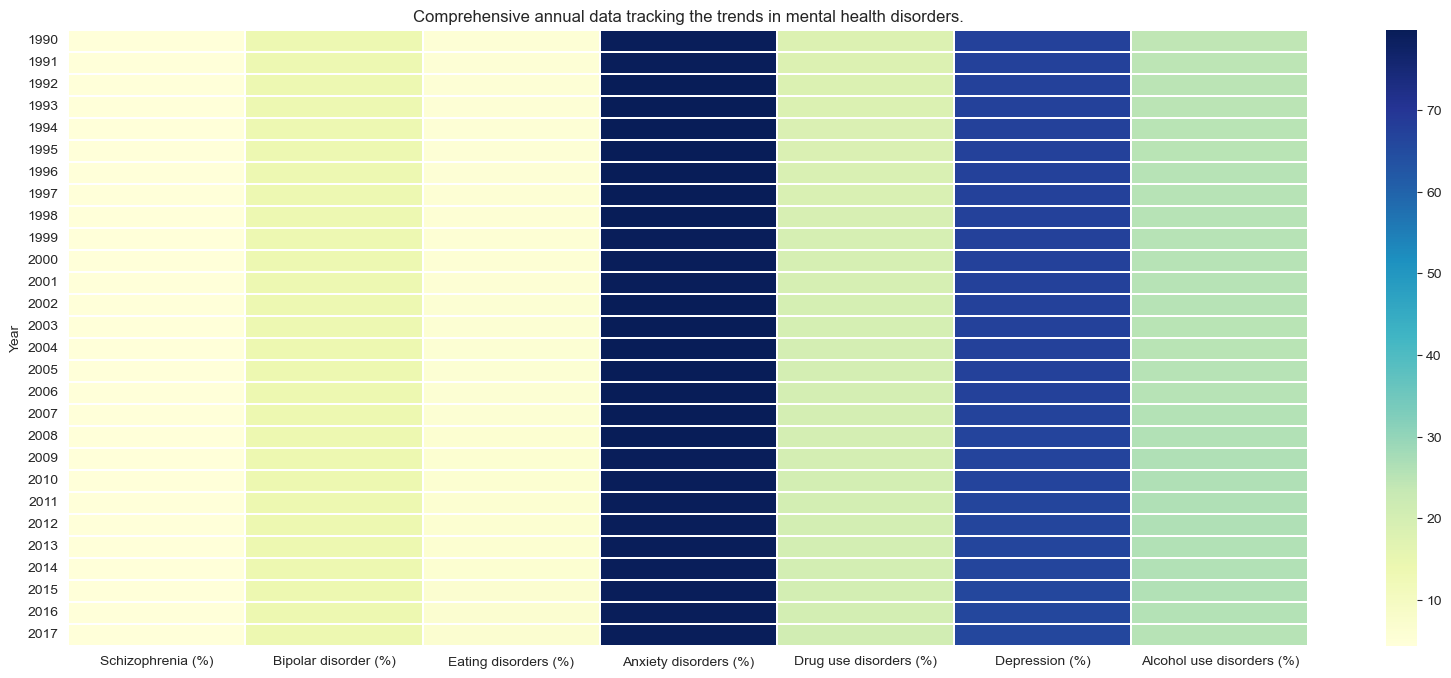

In [307]:
count_df.index = count_df.index.year 
plt.figure(figsize=(20, 8))
plt.title("Comprehensive annual data tracking the trends in mental health disorders.")
sns.heatmap(count_df2, linewidths=0.025, cmap="YlGnBu");

### As depicted in the chart, Schizophrenia, Eating disorders, and Bipolar disorders exhibit lower prevalence rates compared to other mental health disorders. Nonetheless, their collective importance remains undiminished.

### Let's examine the evolving patterns and trajectories of certain mental health disorders.

In [340]:
count1_df = countries_df.groupby("Year")[["Schizophrenia (%)"]].sum()
count2_df = countries_df.groupby("Year")[["Bipolar disorder (%)"]].sum()
count3_df = countries_df.groupby("Year")[["Eating disorders (%)"]].sum()
count4_df = countries_df.groupby("Year")[["Anxiety disorders (%)"]].sum()
count5_df = countries_df.groupby("Year")[["Drug use disorders (%)"]].sum()
count6_df = countries_df.groupby("Year")[["Depression (%)"]].sum()
count7_df = countries_df.groupby("Year")[["Alcohol use disorders (%)"]].sum()

In [341]:
count1_df.index = count1_df.index.year
count2_df.index = count2_df.index.year
count3_df.index = count3_df.index.year
count4_df.index = count4_df.index.year
count5_df.index = count5_df.index.year
count6_df.index = count6_df.index.year
count7_df.index = count7_df.index.year

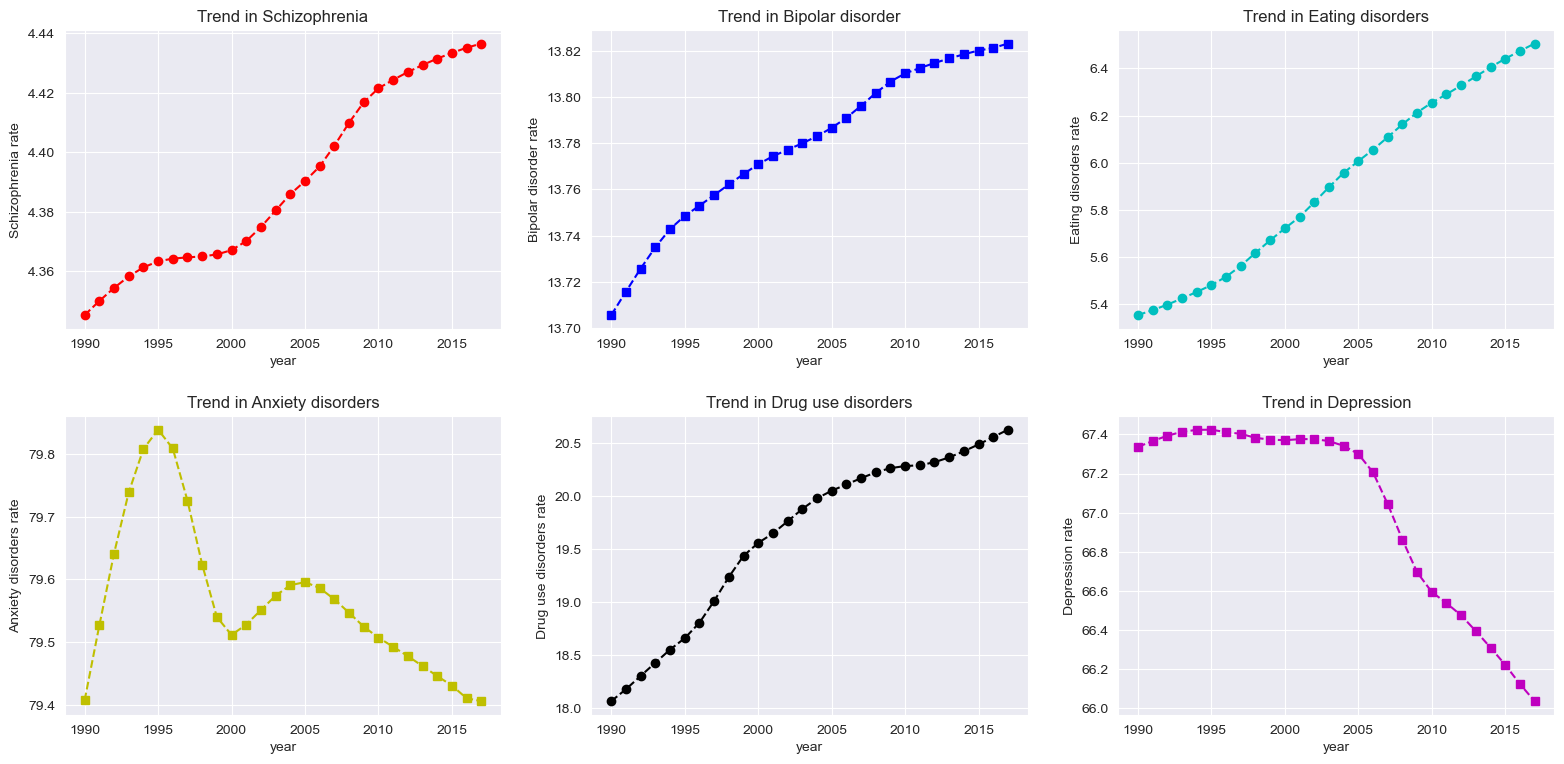

In [344]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0,0].plot(count1_df.index, count1_df, "o--r")
axes[0,0].set_xlabel("year")
axes[0,0].set_ylabel("Schizophrenia rate")
axes[0,0].set_title("Trend in Schizophrenia")


axes[0,1].plot(count2_df.index, count2_df, "s--b")
axes[0,1].set_xlabel("year")
axes[0,1].set_ylabel("Bipolar disorder rate")
axes[0,1].set_title("Trend in Bipolar disorder")


axes[0,2].plot(count3_df.index, count3_df, "o--c")
axes[0,2].set_xlabel("year")
axes[0,2].set_ylabel("Eating disorders rate")
axes[0,2].set_title("Trend in Eating disorders")


axes[1,0].plot(count4_df.index, count4_df, "s--y")
axes[1,0].set_xlabel("year")
axes[1,0].set_ylabel("Anxiety disorders rate")
axes[1,0].set_title("Trend in Anxiety disorders")


axes[1,1].plot(count5_df.index, count5_df, "o--k")
axes[1,1].set_xlabel("year")
axes[1,1].set_ylabel("Drug use disorders rate")
axes[1,1].set_title("Trend in Drug use disorders")


axes[1,2].plot(count6_df.index, count6_df, "s--m")
axes[1,2].set_xlabel("year")
axes[1,2].set_ylabel("Depression rate")
axes[1,2].set_title("Trend in Depression")

plt.tight_layout(pad=2)

`Schizophrenia:` Over the span of the years, starting from 1990, a notable surge in its global incidence becomes                        apparent.

`Bipolar disorder:` Same as Schizophrenia.

`Eating disorders:` Eating disorders worldwide have significantly increased since 1990.

`Anxiety disorders:` Anxiety disorders have displayed a substantial increase since 1990, reaching their apex in 1995.  Subsequently, there has been a noticeable decline, with the most pronounced drop occurring in 2000.

`Drug use disorders:` Its global presence has notably surged.

`Depression`: Also peaking at 1995. Subsequestly, there has been a noticeable decline.

### Lets conduct a comparative analysis of various countries, exploring the prevalence rates of distinct mental health disorders within each nation.

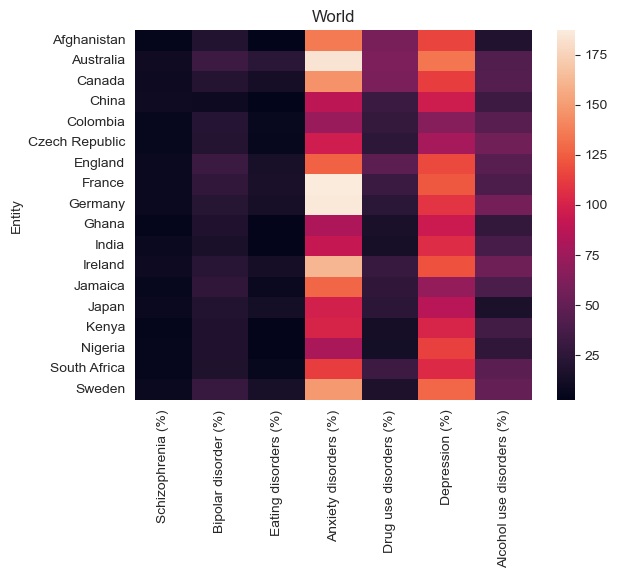

In [207]:
co_df = countries_df.groupby("Entity")[["Schizophrenia (%)" ,"Bipolar disorder (%)", "Eating disorders (%)", "Anxiety disorders (%)", "Drug use disorders (%)", "Depression (%)", "Alcohol use disorders (%)"]].sum()
plt.title("World")
sns.heatmap(co_df);

### As evident from the heatmap depicted above, it becomes apparent that the prevalence of Schizophrenia and Eating disorder cases is relatively lower when compared with the prevalence of anxiety disorders and depression.

### Now, as we delve into the analysis, we'll explore a variety of questions. Despite its relatively lower global prevalence compared to other disorders, Schizophrenia remains a topic of significant importance. For instance, we'll identify the country with the highest number of Schizophrenia cases, exemplifying the kind of inquiries we'll address through our comprehensive analysis.

### Q:What Country has the highest number of Schizophrenia cases?

##### To gain a comprehensive understanding and identify nations with the highest prevalence of Schizophrenia, let's create a dataframe.

In [239]:
max_schizo_cases = countries_df.sort_values("Schizophrenia (%)", ascending=False).head(20)
max_schizo_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
323,Australia,AUS,2005-01-01,0.367078,1.149604,0.884259,6.684743,2.086480,4.929038,1.449451
324,Australia,AUS,2006-01-01,0.366969,1.149700,0.896383,6.681046,2.056730,4.923528,1.453958
322,Australia,AUS,2004-01-01,0.366824,1.149127,0.870440,6.652206,2.137957,4.920486,1.460324
325,Australia,AUS,2007-01-01,0.366635,1.149731,0.906580,6.667900,2.027429,4.906827,1.464827
321,Australia,AUS,2003-01-01,0.366274,1.148158,0.850376,6.578489,2.215742,4.892317,1.486347
326,Australia,AUS,2008-01-01,0.366204,1.149689,0.915572,6.650491,2.003808,4.882334,1.478267
327,Australia,AUS,2009-01-01,0.365813,1.149596,0.923455,6.634350,1.991759,4.857927,1.490525
320,Australia,AUS,2002-01-01,0.365602,1.147003,0.828231,6.491120,2.297017,4.854392,1.517321
328,Australia,AUS,2010-01-01,0.365598,1.149425,0.928043,6.624617,1.993151,4.834220,1.497867
329,Australia,AUS,2011-01-01,0.365464,1.149079,0.931935,6.619503,2.007703,4.813622,1.501284


#### As we can see in the above dataframe, Australia has the most cases of Schizophrenia.

#### To gain a more comprehensive understanding of this information, let's represent it visually using a plot.

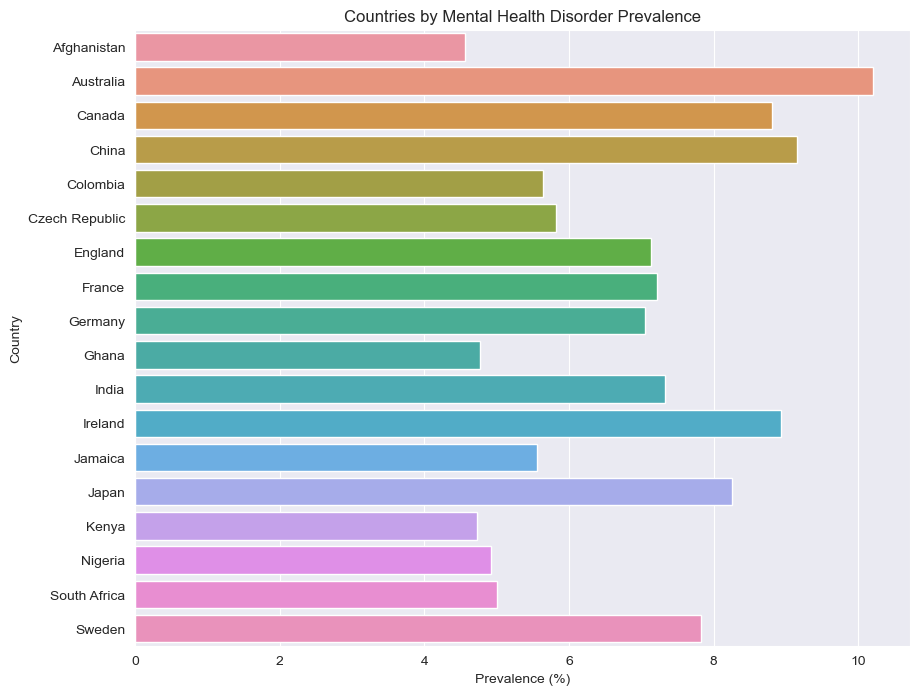

In [241]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Schizophrenia (%)', y='Entity', estimator="sum", errorbar=None, data=countries_df)
plt.title('Countries by Mental Health Disorder Prevalence')
plt.xlabel('Prevalence (%)')
plt.ylabel('Country')
plt.show()

##### As we can see in the above plot, Australia has the highest number of schizophrenia cases

#### Our two highest mental health disorder cases over the years 1990 to 2017 were Anxiety disorders and Depression. Now we're going to identify countries with the highest prevalence of these mental health disorders.

### Q:What Country has the highest number of Depression cases?

#### Just like what was done in the case of Schizophrenia. Let's create a dataframe to gain a comprehensive understanding and identify nations with the highest prevalence of Depression.

In [265]:
max_dps_cases = countries_df.sort_values("Depression (%)", ascending=False).head(10)
max_dps_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
323,Australia,AUS,2005-01-01,0.367078,1.149604,0.884259,6.684743,2.086480,4.929038,1.449451
324,Australia,AUS,2006-01-01,0.366969,1.149700,0.896383,6.681046,2.056730,4.923528,1.453958
322,Australia,AUS,2004-01-01,0.366824,1.149127,0.870440,6.652206,2.137957,4.920486,1.460324
325,Australia,AUS,2007-01-01,0.366635,1.149731,0.906580,6.667900,2.027429,4.906827,1.464827
321,Australia,AUS,2003-01-01,0.366274,1.148158,0.850376,6.578489,2.215742,4.892317,1.486347
326,Australia,AUS,2008-01-01,0.366204,1.149689,0.915572,6.650491,2.003808,4.882334,1.478267
327,Australia,AUS,2009-01-01,0.365813,1.149596,0.923455,6.634350,1.991759,4.857927,1.490525
320,Australia,AUS,2002-01-01,0.365602,1.147003,0.828231,6.491120,2.297017,4.854392,1.517321
328,Australia,AUS,2010-01-01,0.365598,1.149425,0.928043,6.624617,1.993151,4.834220,1.497867
319,Australia,AUS,2001-01-01,0.364995,1.145961,0.808347,6.417576,2.360694,4.823557,1.543209


#### Just like in the case of Schizophrenia, Australia has the highest cases of Depression. Let's use a plot for our visual analysis.

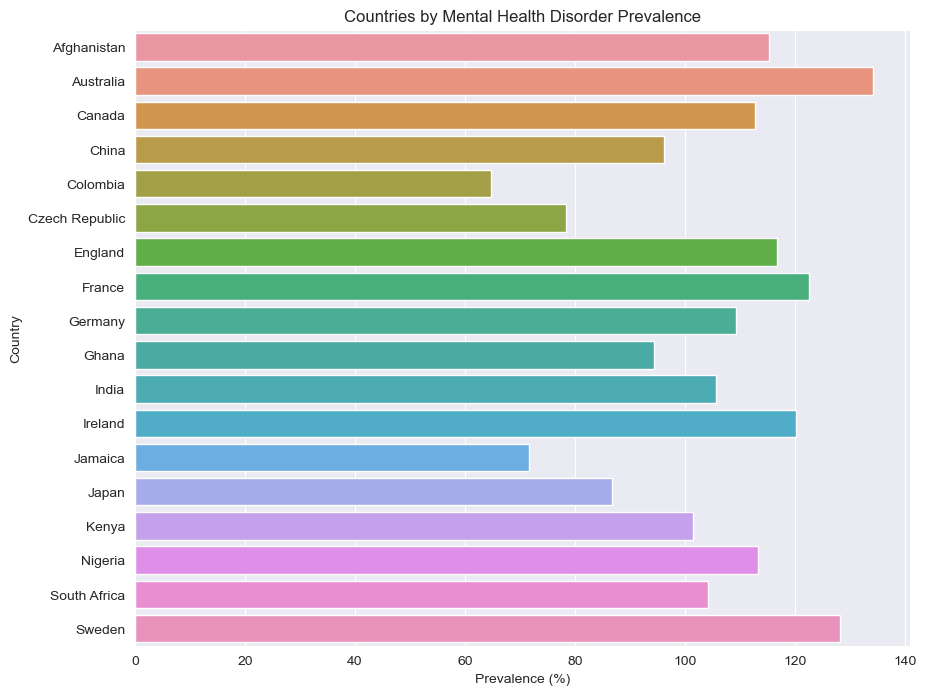

In [235]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Depression (%)', y='Entity', estimator="sum", errorbar=None, data=countries_df)
plt.title('Countries by Mental Health Disorder Prevalence')
plt.xlabel('Prevalence (%)')
plt.ylabel('Country')
plt.show()

#### Australia has the most cases of Depression. While, Colombia has the least cases.

### Q:What Country has the highest number of Anxiety disorders cases?

In [244]:
max_anxiety_cases = countries_df.sort_values("Anxiety disorders (%)", ascending=False).head(10)
max_anxiety_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2162,Germany,DEU,1996-01-01,0.253013,0.769904,0.480072,6.784381,0.757573,3.882934,2.153615
2161,Germany,DEU,1995-01-01,0.253191,0.769741,0.477758,6.783240,0.750722,3.899397,2.151015
2059,France,FRA,2005-01-01,0.259043,0.967399,0.545991,6.782676,1.162593,4.227000,1.442389
2163,Germany,DEU,1997-01-01,0.252516,0.770266,0.481373,6.782581,0.771770,3.857159,2.159982
2058,France,FRA,2004-01-01,0.259010,0.968034,0.542626,6.781921,1.144807,4.256865,1.433206
2057,France,FRA,2003-01-01,0.258905,0.969513,0.539298,6.777747,1.120602,4.302944,1.424034
2164,Germany,DEU,1998-01-01,0.251897,0.770694,0.482843,6.777523,0.787138,3.827479,2.166560
2056,France,FRA,2002-01-01,0.258778,0.971261,0.535173,6.771649,1.096955,4.352313,1.415662
2060,France,FRA,2006-01-01,0.258875,0.966956,0.548996,6.769683,1.178537,4.227962,1.454070
2165,Germany,DEU,1999-01-01,0.251375,0.771111,0.484153,6.769400,0.802411,3.804899,2.169942


#### In the preceding dataset, it is apparent that Germany and France exhibit a closely contested prevalence of Anxiety disorder cases, with no clear distinction in the reported numbers.To enhance our understanding, let's create a graphical representation of the data for improved clarity.

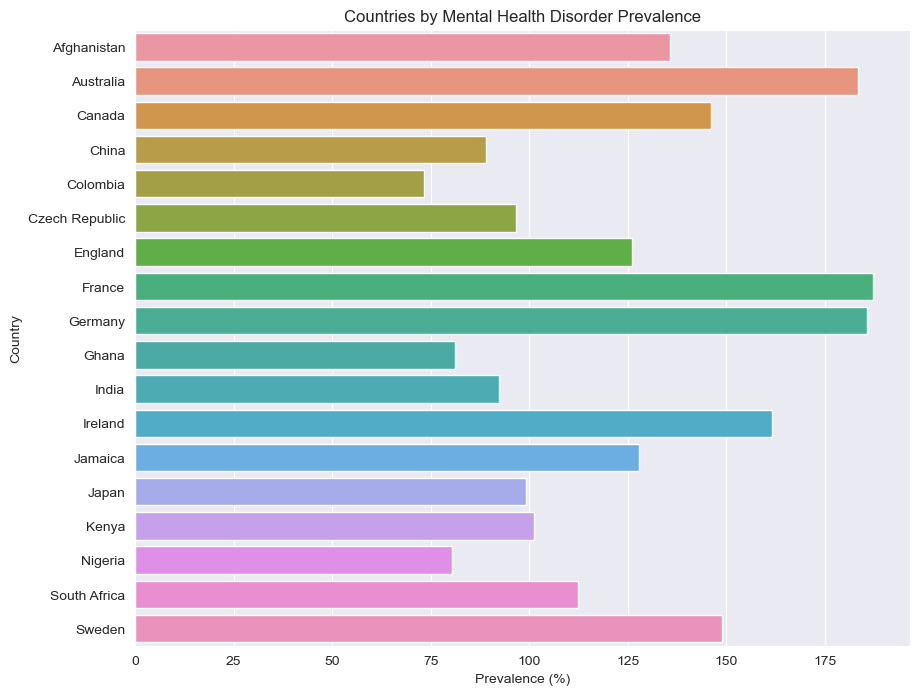

In [233]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Anxiety disorders (%)', y='Entity', estimator="sum", errorbar=None, data=countries_df)
plt.title('Countries by Mental Health Disorder Prevalence')
plt.xlabel('Prevalence (%)')
plt.ylabel('Country')
plt.show()

##### The country with the most cases of Anxiety disorders is France and the country with the least cases is Colombia.

### In the Case of Drug Use disorders

In [298]:
max_drug_cases = countries_df.sort_values("Drug use disorders (%)", ascending=False).head(10)
max_drug_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
22,Afghanistan,AFG,2012-01-01,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372
21,Afghanistan,AFG,2011-01-01,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
23,Afghanistan,AFG,2013-01-01,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433
20,Afghanistan,AFG,2010-01-01,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
24,Afghanistan,AFG,2014-01-01,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447
19,Afghanistan,AFG,2009-01-01,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
25,Afghanistan,AFG,2015-01-01,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276
26,Afghanistan,AFG,2016-01-01,0.166035,0.707686,0.105808,4.878875,2.513553,4.135694,0.661850
18,Afghanistan,AFG,2008-01-01,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
27,Afghanistan,AFG,2017-01-01,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217


In [300]:
sum_drug_cases = max_drug_cases["Drug use disorders (%)"].sum()
print("From 1990 to 2017 Afghanistan has had {:.2f}% total cases of drug use disorders".
      format(sum_drug_cases).upper())

FROM 1990 TO 2017 AFGHANISTAN HAS HAD 25.41% TOTAL CASES OF DRUG USE DISORDERS


#### FROM 1990 TO 2017 AFGHANISTAN HAS HAD 25.41% TOTAL CASES OF DRUG USE DISORDERS

### Q:What Country has the highest number of Alcohol use disorders?

In [295]:
max_alcohol_cases = countries_df.sort_values("Alcohol use disorders (%)", ascending=False).head(10)
max_alcohol_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2165,Germany,DEU,1999-01-01,0.251375,0.771111,0.484153,6.769400,0.802411,3.804899,2.169942
2164,Germany,DEU,1998-01-01,0.251897,0.770694,0.482843,6.777523,0.787138,3.827479,2.166560
2166,Germany,DEU,2000-01-01,0.251173,0.771464,0.486240,6.758848,0.815481,3.796650,2.166540
2163,Germany,DEU,1997-01-01,0.252516,0.770266,0.481373,6.782581,0.771770,3.857159,2.159982
2162,Germany,DEU,1996-01-01,0.253013,0.769904,0.480072,6.784381,0.757573,3.882934,2.153615
2161,Germany,DEU,1995-01-01,0.253191,0.769741,0.477758,6.783240,0.750722,3.899397,2.151015
2160,Germany,DEU,1994-01-01,0.252961,0.769755,0.475673,6.765662,0.748763,3.909669,2.150613
2159,Germany,DEU,1993-01-01,0.252406,0.769905,0.472826,6.722349,0.749180,3.920866,2.149036
2158,Germany,DEU,1992-01-01,0.251561,0.770204,0.469393,6.658989,0.753456,3.930588,2.146702
2157,Germany,DEU,1991-01-01,0.250472,0.770712,0.465226,6.581742,0.759452,3.938162,2.144217


In [296]:
sum_alcohol_cases = max_alcohol_cases["Alcohol use disorders (%)"].sum()
print("From 1990 to 2017 Germany has had {:.2f}% total cases of alcohol use disorders"
      .format(sum_alcohol_cases).upper())

FROM 1990 TO 2017 GERMANY HAS HAD 21.56% TOTAL CASES OF ALCOHOL USE DISORDERS


#### FROM 1990 TO 2017 GERMANY HAS HAD 21.56% TOTAL CASES OF ALCOHOL USE DISORDERS

#### Note: While Germany is renowned for its significant beer consumption, it's important to discern that an alcohol use disorder extends beyond mere beer consumption.

### Q:What Country has the highest number of Bipolar disorder?

In [292]:
max_bipolar_disorder = countries_df.sort_values("Bipolar disorder (%)", ascending=False).head(10)
max_bipolar_disorder

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
325,Australia,AUS,2007-01-01,0.366635,1.149731,0.906580,6.667900,2.027429,4.906827,1.464827
324,Australia,AUS,2006-01-01,0.366969,1.149700,0.896383,6.681046,2.056730,4.923528,1.453958
326,Australia,AUS,2008-01-01,0.366204,1.149689,0.915572,6.650491,2.003808,4.882334,1.478267
323,Australia,AUS,2005-01-01,0.367078,1.149604,0.884259,6.684743,2.086480,4.929038,1.449451
327,Australia,AUS,2009-01-01,0.365813,1.149596,0.923455,6.634350,1.991759,4.857927,1.490525
328,Australia,AUS,2010-01-01,0.365598,1.149425,0.928043,6.624617,1.993151,4.834220,1.497867
322,Australia,AUS,2004-01-01,0.366824,1.149127,0.870440,6.652206,2.137957,4.920486,1.460324
329,Australia,AUS,2011-01-01,0.365464,1.149079,0.931935,6.619503,2.007703,4.813622,1.501284
330,Australia,AUS,2012-01-01,0.365245,1.148473,0.935760,6.614107,2.032422,4.790080,1.504314
321,Australia,AUS,2003-01-01,0.366274,1.148158,0.850376,6.578489,2.215742,4.892317,1.486347


In [294]:
sum_bipolar_disorder = max_bipolar_disorder["Bipolar disorder (%)"].sum()
print("From 1990 to 2017 Australia has had {:.2f}% total cases of Bipolar disorders"
      .format(sum_bipolar_disorder).upper())

FROM 1990 TO 2017 AUSTRALIA HAS HAD 11.49% TOTAL CASES OF BIPOLAR DISORDERS


#### FROM 1990 TO 2017 AUSTRALIA HAS HAD 11.49% TOTAL CASES OF BIPOLAR DISORDERS


### Q:What Country has the highest number of Eating disorders?

In [302]:
max_eating_disorders = countries_df.sort_values("Eating disorders (%)", ascending=False).head(10)
max_eating_disorders

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
334,Australia,AUS,2016-01-01,0.363743,1.143669,0.943991,6.589757,2.237198,4.659817,1.511465
333,Australia,AUS,2015-01-01,0.364163,1.145130,0.943206,6.595691,2.170634,4.696774,1.510434
335,Australia,AUS,2017-01-01,0.363326,1.142097,0.943081,6.584301,2.315142,4.623881,1.511935
332,Australia,AUS,2014-01-01,0.364577,1.146475,0.941661,6.602041,2.114377,4.731142,1.508926
331,Australia,AUS,2013-01-01,0.364942,1.147593,0.939176,6.608198,2.068835,4.759686,1.506864
330,Australia,AUS,2012-01-01,0.365245,1.148473,0.935760,6.614107,2.032422,4.790080,1.504314
329,Australia,AUS,2011-01-01,0.365464,1.149079,0.931935,6.619503,2.007703,4.813622,1.501284
328,Australia,AUS,2010-01-01,0.365598,1.149425,0.928043,6.624617,1.993151,4.834220,1.497867
327,Australia,AUS,2009-01-01,0.365813,1.149596,0.923455,6.634350,1.991759,4.857927,1.490525
326,Australia,AUS,2008-01-01,0.366204,1.149689,0.915572,6.650491,2.003808,4.882334,1.478267


In [303]:
sum_eating_disorders = max_eating_disorders["Eating disorders (%)"].sum()
print("From 1990 to 2017 Australia has had {:.2f}% total cases of Eating disorders"
      .format(sum_eating_disorders).upper())

FROM 1990 TO 2017 AUSTRALIA HAS HAD 9.35% TOTAL CASES OF EATING DISORDERS


#### FROM 1990 TO 2017 AUSTRALIA HAS HAD 9.35% TOTAL CASES OF EATING DISORDERS

### In conclusion, lets examine which country ranks the highest in both categories of "Depression" and "Bipolar disorders." This inquiry stems from the recognition of the link between Depression and Bipolar disorders as interconnected aspects of our analytical focus.

In [345]:
max_cases = max_bipolar_disorder.merge(max_dps_cases)
max_cases

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Australia,AUS,2007-01-01,0.366635,1.149731,0.906580,6.667900,2.027429,4.906827,1.464827
1,Australia,AUS,2006-01-01,0.366969,1.149700,0.896383,6.681046,2.056730,4.923528,1.453958
2,Australia,AUS,2008-01-01,0.366204,1.149689,0.915572,6.650491,2.003808,4.882334,1.478267
3,Australia,AUS,2005-01-01,0.367078,1.149604,0.884259,6.684743,2.086480,4.929038,1.449451
4,Australia,AUS,2009-01-01,0.365813,1.149596,0.923455,6.634350,1.991759,4.857927,1.490525
5,Australia,AUS,2010-01-01,0.365598,1.149425,0.928043,6.624617,1.993151,4.834220,1.497867
6,Australia,AUS,2004-01-01,0.366824,1.149127,0.870440,6.652206,2.137957,4.920486,1.460324
7,Australia,AUS,2003-01-01,0.366274,1.148158,0.850376,6.578489,2.215742,4.892317,1.486347


### It is Australia, who has maximum cases reported in both categories

# Analysis and Deductions

### In the context of global trends in mental health disorders, this project's primary objective was to conduct a comprehensive analysis spanning various years to ascertain the prevailing situation. Through data visualization and the formulation of pertinent questions, our investigation has yielded significant insights related to mental health:

1. `Prevalence of Disorders:` Our analysis has uncovered the striking global prevalence of various mental health disorders, from schizophrenia to eating disorders, reflecting the substantial impact of these conditions on individuals' lives around the world.

2. `Temporal Trends:` We noted that specific years exhibited a pronounced surge in reported cases of mental health disorders, suggesting evolving trends in the prevalence of these conditions on a global scale.

3. `Global Disparities:` By pinpointing the countries with the highest reported cases of mental health disorders, we aimed to emphasize the disparities in mental health conditions across different geographical areas.

4. `Comparative Insights:` We conducted in-depth comparisons to identify the countries that reported the highest instances of distinct mental health disorders. This analysis reveals critical information about the prevalence and distribution of these conditions.

5. `Cumulative Impact:` Through our comprehensive study, we calculated the total number of reported cases from 1990 to 2017, painting a holistic picture of the cumulative impact of mental health disorders, country by country.


This project provides valuable insights into global mental health trends, contributing to a deeper understanding of the challenges posed by these disorders on a global scale.

## References and Future Work

### References:

* For knowing more about pandas and it's functions in deatil - https://pandas.pydata.org
* For more ideas on matplotlib and its library - https://matplotlib.org/3.1.1/gallery/index.html
* Also, for Seaborn plots and its library - https://seaborn.pydata.org/examples/index.html

### Future Work:

I plan to work on more mental health datasets and would also expand and branch out to other datasets like Stock markets or Nasa. Knowledge is everywhere :)